In [11]:
import pandas as pd
import numpy as np
import scanpy as sc
import sys
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [14]:
def printdf(df, round=2):
    with io.StringIO() as buffer:
        df.round(round).to_csv(buffer, sep=' ', index=False)
        print(buffer.getvalue())

# SEQKIT Summary

In [2]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/scpc_test/reports/seqkit/raw.fastq.report.txt"

pdf = pd.read_csv(fpath, sep=r"\s+")
pdf['sample'] = pdf['file'].apply(lambda x: x[:2])
pdf['cell'] = pdf['file'].apply(lambda x: x[2:5])

columns = [
    'num_seqs',
    'sum_len',
    'min_len',
    'avg_len',
    'max_len',
    'N50',
] 

for c in columns:
    pdf[c] = pdf[c].astype(str).str.replace(',', '').astype(float)

print(f"{pdf.shape=}")
pdf.head()

pdf.shape=(281, 19)


,file,format,type,num_seqs,sum_len,min_len,avg_len,max_len,Q1,Q2,Q3,sum_gap,N50,Q20(%),Q30(%),AvgQual,GC(%),sample,cell
0,o1b01.raw.fastq,FASTQ,DNA,2167.0,1611820.0,143.0,743.8,6463.0,390,601,927,0,900.0,71.67,58.20,14.67,43.88,o1,b01
1,o1b02.raw.fastq,FASTQ,DNA,175455.0,230059803.0,39.0,1311.2,10324.0,864,"1,332","1,646",0,1540.0,36.12,11.65,14.15,42.69,o1,b02
2,o1b03.raw.fastq,FASTQ,DNA,275086.0,352365516.0,38.0,1280.9,9801.0,813,"1,257","1,608",0,1442.0,26.68,5.04,13.89,43.17,o1,b03
3,o1b04.raw.fastq,FASTQ,DNA,292912.0,398683904.0,38.0,1361.1,109418.0,942,"1,295","1,611",0,1502.0,34.24,10.05,14.00,42.75,o1,b04
4,o1b05.raw.fastq,FASTQ,DNA,431367.0,580758138.0,35.0,1346.3,11049.0,945,"1,313","1,658",0,1552.0,30.54,7.01,14.11,42.53,o1,b05


# Summary by sample

In [15]:
gx = pdf.groupby('sample').agg(
    n_cells = ('file', 'nunique'),
    n_reads = ('num_seqs', 'sum'),
    n_bases = ('sum_len', 'sum'),
    mean_N50 = ('N50', 'mean'),
    longest_read = ('max_len', 'max'),
    mean_base_qual = ('AvgQual', 'mean'),
)

gx['n_gb'] = gx['n_bases'] / 1e9

cols = gx.columns
gx = gx.reset_index(drop=False)

# for c in cols:
#     plt.rcParams['figure.dpi'] = 200
#     plt.rcParams['figure.figsize'] = 1.5, 2
#     sns.barplot(data=gx, 
#                 x='sample',
#                 y=c,
#                 ec='k')
#     sns.despine()
#     plt.show()

printdf(gx)

sample n_cells n_reads n_bases mean_N50 longest_read mean_base_qual n_gb
o1 95 22604856.0 30078834824.0 1471.89 153334.0 14.12 30.08
o2 91 6017038.0 4548700181.0 1017.33 41255.0 14.3 4.55
o3 95 29130404.0 27888865273.0 1599.75 103569.0 14.45 27.89



In [18]:
# printdf(pdf)

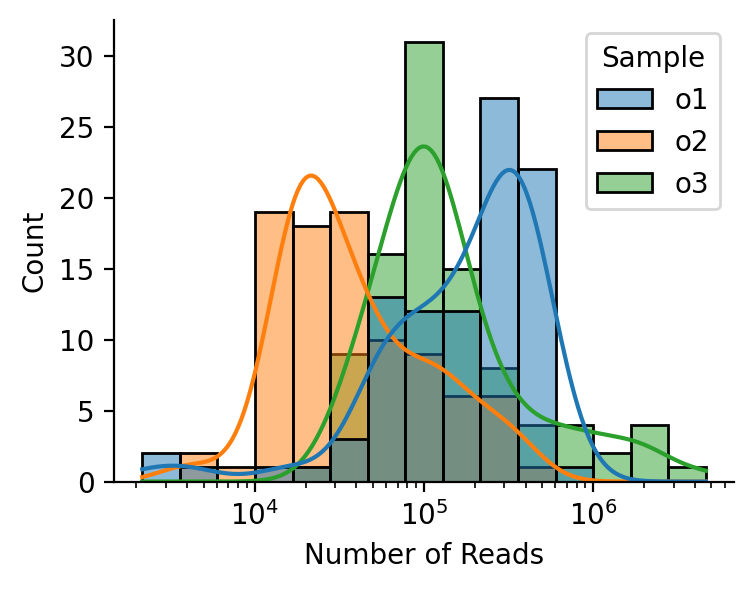

In [22]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 4, 3

sns.histplot(data=pdf, 
             x='num_seqs',
             hue='sample',
             kde=True,
             log_scale=True,
         )
ax = plt.gca()
plt.xlabel("Number of Reads")
sns.despine()
sns.move_legend(ax, 
                title='Sample',
                loc='best')

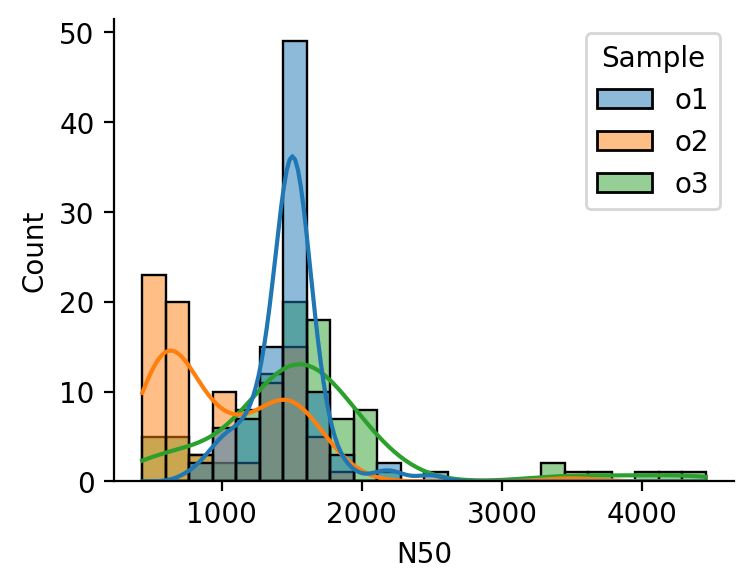

In [24]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 4, 3

sns.histplot(data=pdf, 
             x='N50',
             hue='sample',
             kde=True,
             # log_scale=True,
         )
ax = plt.gca()
plt.xlabel("N50")
sns.despine()
sns.move_legend(ax, 
                title='Sample',
                loc='best')

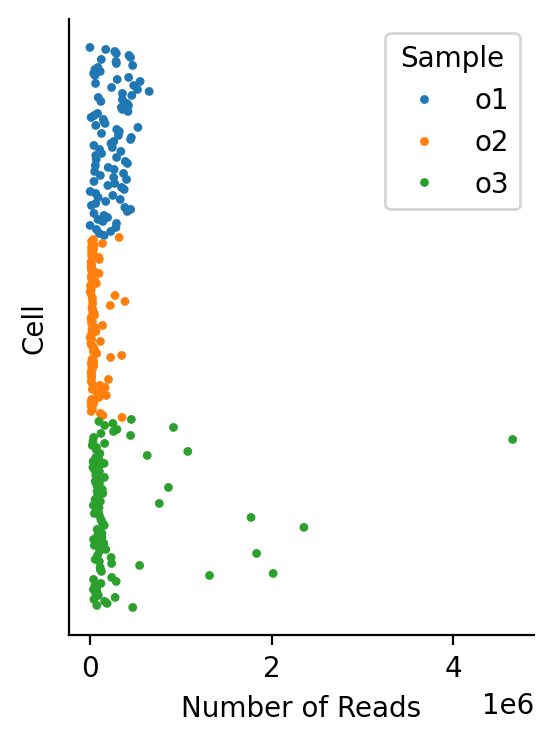

In [4]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 3, 4

sns.scatterplot(data=pdf, 
                x='num_seqs',
                y='file',
                hue='sample',
                ec='none',
                s=10)
ax = plt.gca()
_ = ax.set_yticklabels([])
_ = ax.set_yticks([])
plt.ylabel("Cell")
plt.xlabel("Number of Reads")
sns.despine()
sns.move_legend(ax, 
                title='Sample',
                loc='best')

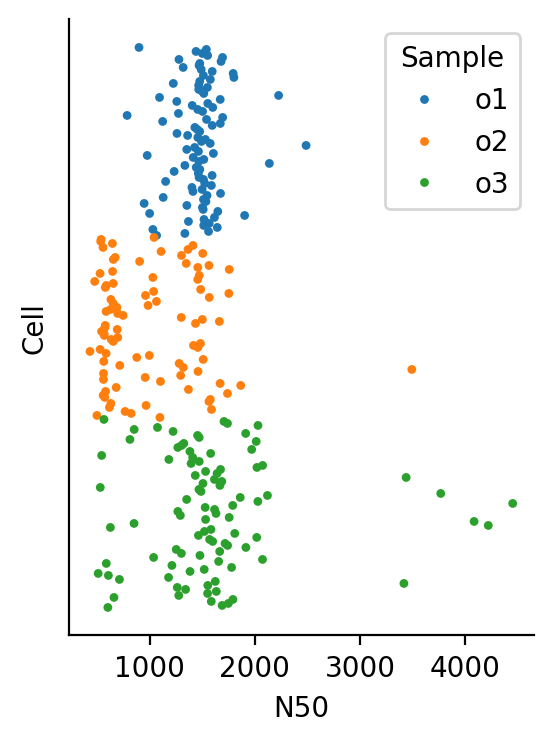

In [5]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 3, 4

sns.scatterplot(data=pdf, 
                x='N50',
                y='file',
                hue='sample',
                ec='none',
                s=10)
ax = plt.gca()
_ = ax.set_yticklabels([])
_ = ax.set_yticks([])
plt.ylabel("Cell")
plt.xlabel("N50")
sns.despine()
sns.move_legend(ax, 
                title='Sample',
                loc='best')